<a href="https://colab.research.google.com/github/anu-shree-anil/Machine-learning-Algorithms/blob/main/K_Means_Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
from sklearn import datasets
from sklearn import metrics
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import random
import math
from statistics import mean
from sklearn.utils import shuffle
from sklearn.preprocessing import LabelBinarizer
from sklearn.model_selection import KFold
from sklearn.metrics import confusion_matrix, precision_score, recall_score, f1_score, accuracy_score, classification_report


In [2]:
#loading the data
wine=datasets.load_wine()
print(wine.DESCR)
df=pd.DataFrame(data=np.c_[wine['data'],wine['target']],columns=wine['feature_names']+['target'])
X=pd.DataFrame(wine.data)
print("ORIGINAL DATA:")
print(df)

#normalize the dataset
for column in X.columns:
    X[column] = (X[column] - X[column].min()) / (X[column].max() - X[column].min()) 

df=X.copy()

print("Dataset without the labels: \n",df)
df=df.to_numpy()

.. _wine_dataset:

Wine recognition dataset
------------------------

**Data Set Characteristics:**

    :Number of Instances: 178 (50 in each of three classes)
    :Number of Attributes: 13 numeric, predictive attributes and the class
    :Attribute Information:
 		- Alcohol
 		- Malic acid
 		- Ash
		- Alcalinity of ash  
 		- Magnesium
		- Total phenols
 		- Flavanoids
 		- Nonflavanoid phenols
 		- Proanthocyanins
		- Color intensity
 		- Hue
 		- OD280/OD315 of diluted wines
 		- Proline

    - class:
            - class_0
            - class_1
            - class_2
		
    :Summary Statistics:
    
    ============================= ==== ===== ======= =====
                                   Min   Max   Mean     SD
    ============================= ==== ===== ======= =====
    Alcohol:                      11.0  14.8    13.0   0.8
    Malic Acid:                   0.74  5.80    2.34  1.12
    Ash:                          1.36  3.23    2.36  0.27
    Alcalinity of Ash:            1

(48.97029115513917, array([[0.544689  , 0.47844053, 0.56013612, 0.53833177, 0.31146245,
        0.24476489, 0.10713464, 0.61852487, 0.22827646, 0.4826404 ,
        0.19254989, 0.16090576, 0.24739982],
       [0.31566416, 0.24330259, 0.47330447, 0.49762723, 0.2494824 ,
        0.45495348, 0.38399973, 0.41090147, 0.3973762 , 0.14956119,
        0.47038328, 0.58968545, 0.15846976],
       [0.7077193 , 0.24189723, 0.58636364, 0.34424399, 0.4115942 ,
        0.64327586, 0.55587201, 0.29937107, 0.47865405, 0.35688282,
        0.48116531, 0.69133089, 0.59901331]]))


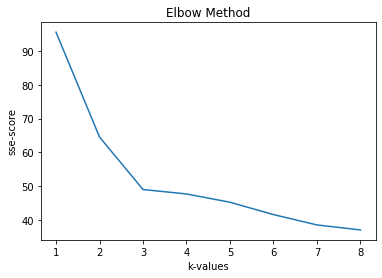

In [6]:
def centroids(dataset,k):

  number_of_rows = dataset.shape[0]
  random_indices = np.random.choice(number_of_rows, size=k, replace=False)
  centroids = dataset[random_indices, :]

  return centroids 

def euclidean(x1,x2):
    square = np.square(x1 - x2)
    # Get the sum of the square
    sum_square = np.sum(square)
    distance = np.sqrt(sum_square)

    return distance

def k_means(dataset,k,epochs):
  epoch=0
  cluster=np.array(centroids(dataset,k))
  converged=True
  
  while converged:
    sse=0
    distance_data=[]
    for i in range(len(dataset)):
      l=[]
      for j in range(k):
        l.append(euclidean(dataset[i],cluster[j]))
    
      l.append(l.index(min(l))+1)
      distance_data.append(l)
    
    #updating the clusters
    new_cluster=[]
    
    for j in range(k):
      error=0
      mean_cluster=[]
      for i in range(len(distance_data)):
          if distance_data[i][-1]==j+1:
            mean_cluster.append(dataset[i])
            error=error+np.sum(np.square(dataset[i] - cluster[j]))
      sse=sse+error      
      mean_cluster = np.array(mean_cluster)   
      new_cluster.append(mean_cluster.mean(axis=0) )
    
    new_cluster=np.array(new_cluster)
    epoch=epoch+1  
    if((new_cluster==cluster).all() or epoch>epochs):
        converged=False
    else:
     for j in range(k):
       cluster[j]=new_cluster[j]

  return sse,cluster

sse=k_means(df,3,300)
print(sse)

k_values=[1,2,3,4,5,6,7,8]
sse_elbow=[]
for i in range(len(k_values)):
  sse=k_means(df,k_values[i],300)
  sse_elbow.append(sse[0])

plt.xlabel('k-values')
plt.ylabel('sse-score')
plt.title('Elbow Method')
plt.plot(k_values, sse_elbow)
# function to show the plot
plt.show()  

In [4]:
#using inbuilt functions
from sklearn.cluster import KMeans
Kmean = KMeans(n_clusters=3)
Kmean.fit(df)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=3, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

[[0.544689   0.47844053 0.56013612 0.53833177 0.31146245 0.24476489
  0.10713464 0.61852487 0.22827646 0.4826404  0.19254989 0.16090576
  0.24739982]
 [0.31137521 0.23689915 0.47291703 0.49991686 0.2477209  0.45305895
  0.38240098 0.4117468  0.39742546 0.14773478 0.47351167 0.58897554
  0.15640099]
 [0.70565142 0.24842869 0.58490401 0.3444313  0.41072701 0.64211419
  0.55467939 0.30034024 0.47727155 0.35534046 0.47780888 0.69038612
  0.59389397]]
48.9605171366765


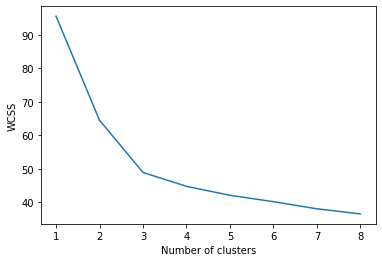

In [5]:
print(Kmean.cluster_centers_)
print(Kmean.inertia_)
wcss = [] 
k_values=[1,2,3,4,5,6,7,8]
for i in k_values: 
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X) 
    wcss.append(kmeans.inertia_)

plt.plot(k_values, wcss)
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') 
plt.show()    